<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/CNN_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 디바이스: {device}")

# 데이터 전처리 설정
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST 평균과 표준편차
])

# MNIST 데이터 로드
print("\nMNIST 데이터 로딩 중...")
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"학습 데이터: {len(train_dataset)}개")
print(f"테스트 데이터: {len(test_dataset)}개")


사용 디바이스: cpu

MNIST 데이터 로딩 중...


100%|██████████| 9.91M/9.91M [00:00<00:00, 14.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 340kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.8MB/s]

학습 데이터: 60000개
테스트 데이터: 10000개


In [2]:

# CNN 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # Convolution Layer 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)

        # Convolution Layer 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)

        # Fully Connected Layers
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.dropout1(self.relu3(self.fc1(x)))
        x = self.fc2(x)
        return x

# 모델 초기화
model = SimpleCNN().to(device)
print("\n모델 구조:")
print(model)



모델 구조:
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)



모델 학습 시작...
Epoch 1/10:
  Train Loss: 0.2576, Train Acc: 92.11%
  Test Loss: 0.0543, Test Acc: 98.24%
Epoch 2/10:
  Train Loss: 0.0866, Train Acc: 97.49%
  Test Loss: 0.0378, Test Acc: 98.76%
Epoch 3/10:
  Train Loss: 0.0660, Train Acc: 98.03%
  Test Loss: 0.0315, Test Acc: 98.88%
Epoch 4/10:
  Train Loss: 0.0534, Train Acc: 98.37%
  Test Loss: 0.0274, Test Acc: 99.07%
Epoch 5/10:
  Train Loss: 0.0445, Train Acc: 98.67%
  Test Loss: 0.0250, Test Acc: 99.11%
Epoch 6/10:
  Train Loss: 0.0402, Train Acc: 98.75%
  Test Loss: 0.0248, Test Acc: 99.19%
Epoch 7/10:
  Train Loss: 0.0347, Train Acc: 98.88%
  Test Loss: 0.0258, Test Acc: 99.08%
Epoch 8/10:
  Train Loss: 0.0306, Train Acc: 99.01%
  Test Loss: 0.0252, Test Acc: 99.24%
Epoch 9/10:
  Train Loss: 0.0264, Train Acc: 99.14%
  Test Loss: 0.0254, Test Acc: 99.19%
Epoch 10/10:
  Train Loss: 0.0230, Train Acc: 99.26%
  Test Loss: 0.0250, Test Acc: 99.17%

최종 테스트 정확도: 99.17%


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/training_history.png'

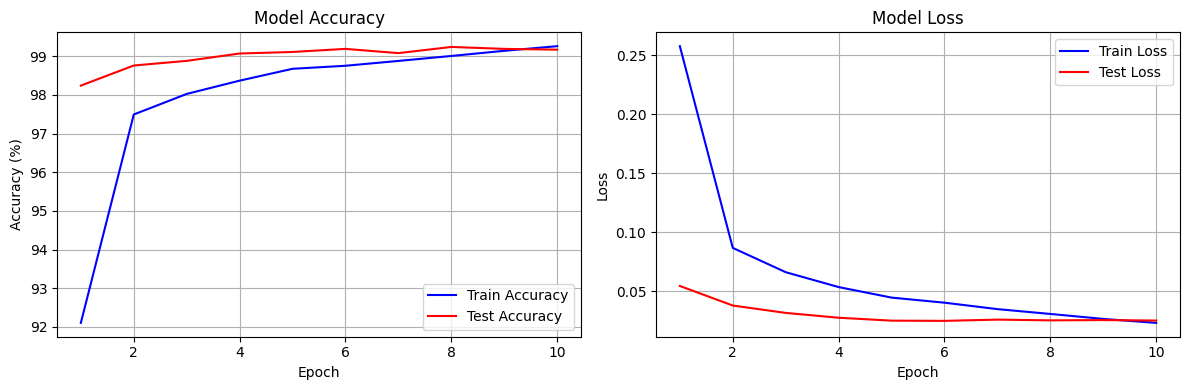

In [3]:

# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 함수
def train_epoch(model, device, train_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()

    accuracy = 100. * correct / total
    avg_loss = train_loss / len(train_loader)
    return avg_loss, accuracy

# 테스트 함수
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()

    accuracy = 100. * correct / total
    avg_loss = test_loss / len(test_loader)
    return avg_loss, accuracy

# 모델 학습
print("\n모델 학습 시작...")
num_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(1, num_epochs + 1):
    train_loss, train_acc = train_epoch(model, device, train_loader, optimizer, criterion)
    test_loss, test_acc = test(model, device, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f'Epoch {epoch}/{num_epochs}:')
    print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
    print(f'  Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')

# 최종 결과
print(f"\n최종 테스트 정확도: {test_accuracies[-1]:.2f}%")

# 학습 곡선 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 정확도 그래프
ax1.plot(range(1, num_epochs + 1), train_accuracies, 'b-', label='Train Accuracy')
ax1.plot(range(1, num_epochs + 1), test_accuracies, 'r-', label='Test Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Model Accuracy')
ax1.legend()
ax1.grid(True)

# 손실 그래프
ax2.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Train Loss')
ax2.plot(range(1, num_epochs + 1), test_losses, 'r-', label='Test Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.set_title('Model Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/training_history.png', dpi=150, bbox_inches='tight')
print("\n학습 곡선이 저장되었습니다.")

# 예측 예시
print("\n일부 테스트 이미지 예측 결과:")
model.eval()
test_iter = iter(test_loader)
images, labels = next(test_iter)
images, labels = images[:5].to(device), labels[:5]

with torch.no_grad():
    outputs = model(images)
    _, predicted = outputs.max(1)

for i in range(5):
    print(f"샘플 {i+1}: 예측={predicted[i].item()}, 실제={labels[i].item()}, " +
          f"일치={predicted[i].item()==labels[i].item()}")

# 모델 저장
torch.save(model.state_dict(), '/mnt/user-data/outputs/mnist_cnn_model.pth')
print("\n모델이 저장되었습니다.")


예측 결과 시각화 중...


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/user-data/outputs/predictions_visualization.png'

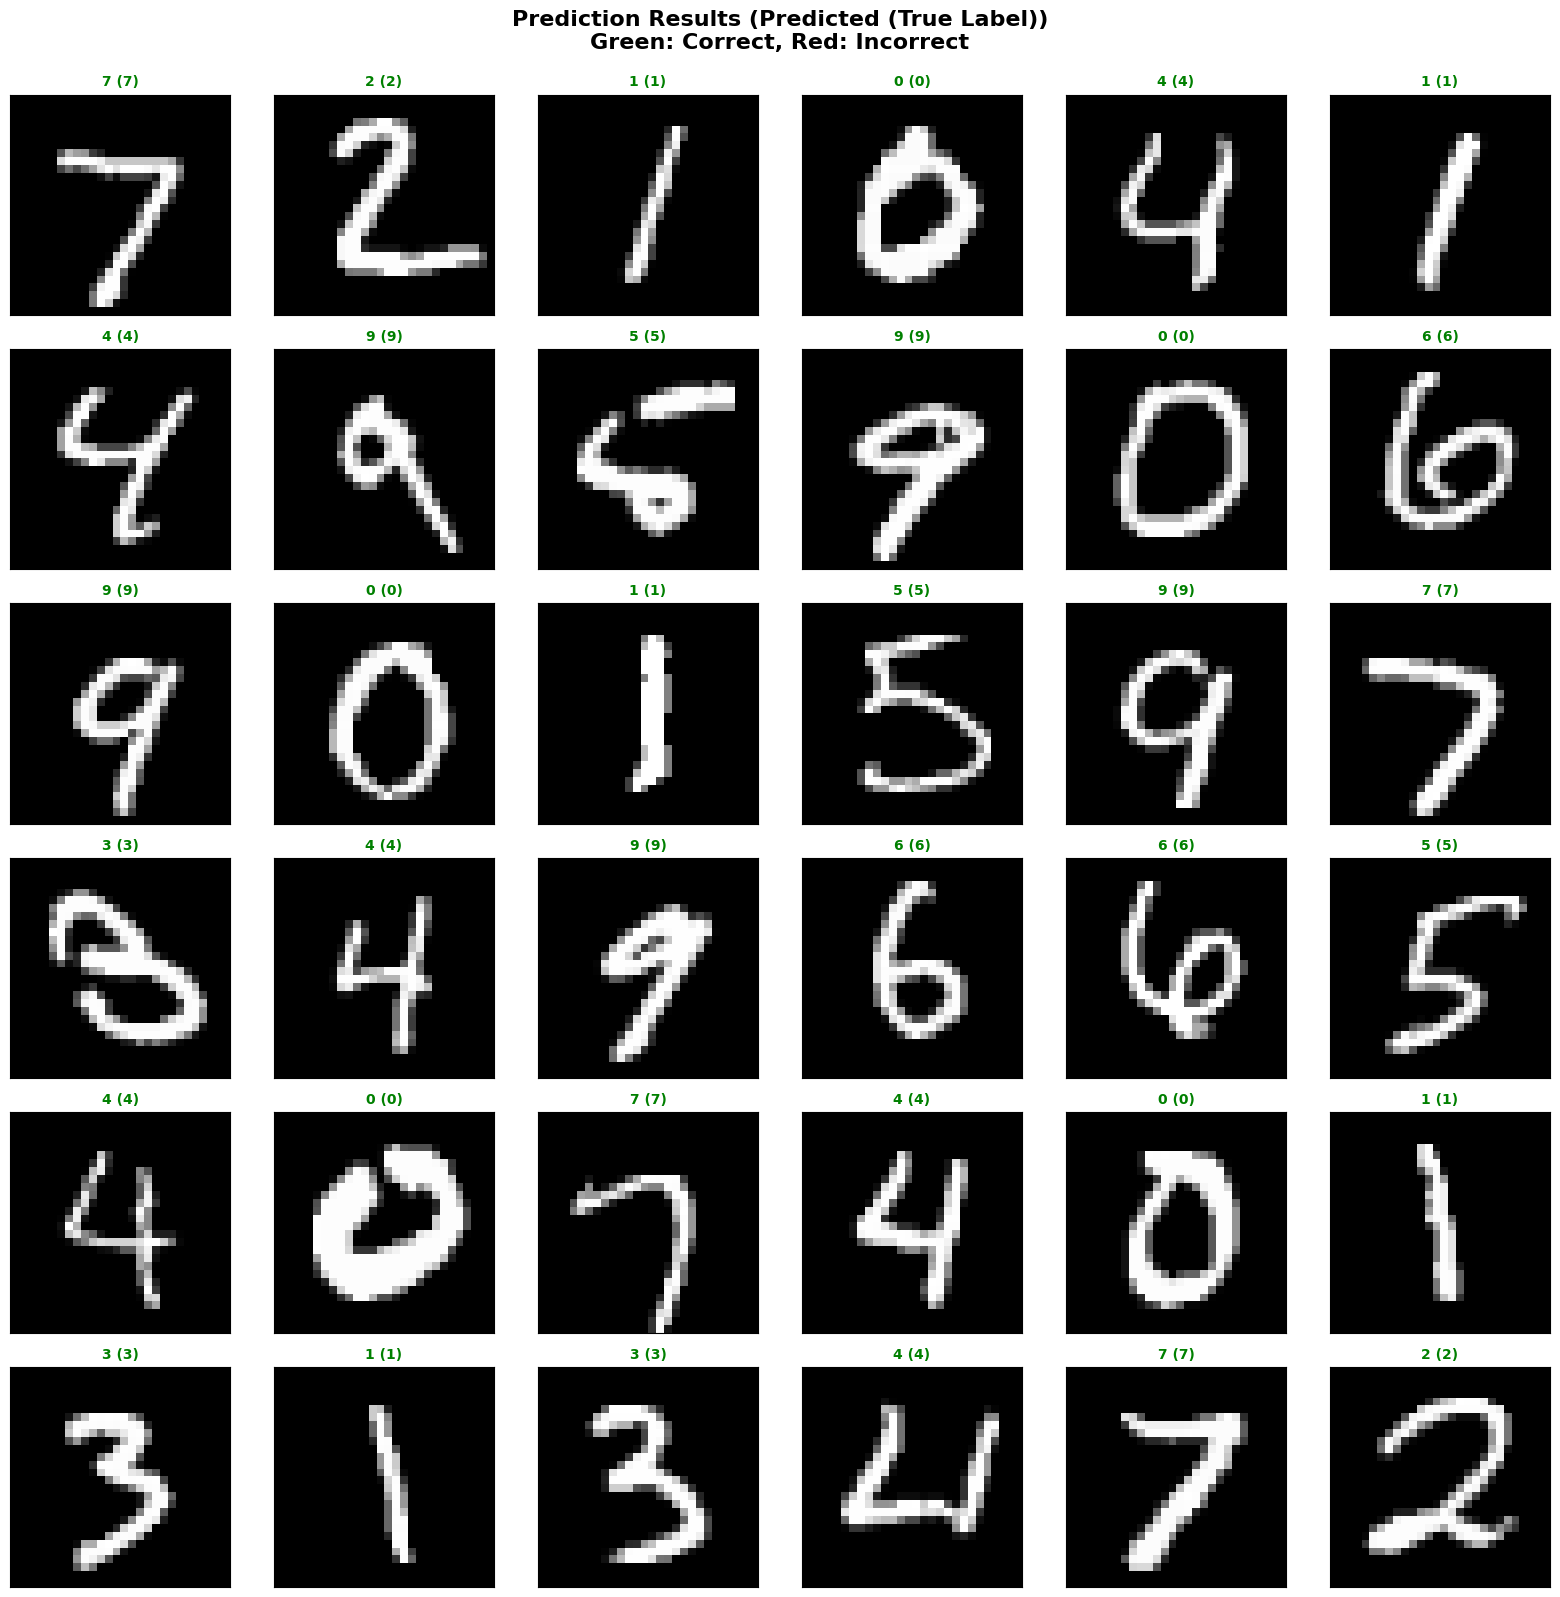

In [4]:
# ============================================================
# 예측 결과 시각화 (요청하신 코드 적용)
# ============================================================
print("\n" + "="*60)
print("예측 결과 시각화 중...")
print("="*60)

model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)  # Move images to the device

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()  # Move images back to CPU for numpy conversion

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(16, 16))
for idx in np.arange(36):
    ax = fig.add_subplot(6, 6, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"),
                 fontsize=10, fontweight='bold')

plt.suptitle('Prediction Results (Predicted (True Label))\nGreen: Correct, Red: Incorrect',
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/predictions_visualization.png', dpi=150, bbox_inches='tight')
print("예측 결과 시각화가 저장되었습니다: predictions_visualization.png")

# 정확도 통계
correct_predictions = (preds == labels.to(device)).sum().item()
total_predictions = len(labels)
accuracy_batch = 100. * correct_predictions / total_predictions
print(f"\n이 배치의 정확도: {correct_predictions}/{total_predictions} = {accuracy_batch:.2f}%")

# 오분류된 샘플 분석
misclassified = []
for idx in range(len(preds)):
    if preds[idx] != labels[idx]:
        misclassified.append({
            'index': idx,
            'predicted': preds[idx].item(),
            'true': labels[idx].item()
        })

if misclassified:
    print(f"\n오분류된 샘플: {len(misclassified)}개")
    print("처음 5개의 오분류:")
    for i, mis in enumerate(misclassified[:5]):
        print(f"  {i+1}. 인덱스 {mis['index']}: 예측={mis['predicted']}, 실제={mis['true']}")
else:
    print("\n이 배치에서 모든 예측이 정확합니다! 🎉")

# 혼동 행렬 생성 (전체 테스트 데이터)
print("\n" + "="*60)
print("전체 테스트 데이터에 대한 혼동 행렬 생성 중...")
print("="*60)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(target.numpy())

# 혼동 행렬
cm = confusion_matrix(all_labels, all_preds)

# 혼동 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('/mnt/user-data/outputs/confusion_matrix.png', dpi=150, bbox_inches='tight')
print("혼동 행렬이 저장되었습니다: confusion_matrix.png")

# 분류 리포트
print("\n분류 리포트:")
print(classification_report(all_labels, all_preds,
                          target_names=[str(i) for i in range(10)]))

# 모델 저장
torch.save(model.state_dict(), '/mnt/user-data/outputs/mnist_cnn_model.pth')
print("\n" + "="*60)
print("모델이 저장되었습니다: mnist_cnn_model.pth")
print("="*60)

print("\n✅ 모든 작업이 완료되었습니다!")
print("\n생성된 파일:")
print("  1. training_history.png - 학습 곡선")
print("  2. predictions_visualization.png - 36개 샘플 예측 결과")
print("  3. confusion_matrix.png - 혼동 행렬")
print("  4. mnist_cnn_model.pth - 학습된 모델")